<a href="https://colab.research.google.com/github/danisotoguerrero/Clasificador-de-canciones/blob/main/Laboratorio_2_Grupo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificador de canciones de Spotify**

## Preparacíon

In [421]:
# Importamos las bibliotecas que sabemos que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [422]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [423]:
# Path de la carpeta donde tenemos los datos ---> Solo hay que cambiar esta parte
folder = "/content/drive/MyDrive/UNI/Big Data/"

In [424]:
# Carga de datos
df = pd.read_csv(folder + "Canciones_Spotify.csv")
# Elimina las columnas
df = df.drop(['song_title', 'artist','time_signature','Unnamed: 0'], axis=1)
df.sample(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target
1979,0.3420,0.591,178026,0.750,0.363000,1,0.0804,-6.599,0,0.0479,149.931,0.380,0
991,0.0208,0.869,233787,0.687,0.000001,1,0.1140,-6.816,1,0.2630,96.006,0.668,1
1147,0.2380,0.457,210091,0.627,0.000000,5,0.1160,-5.091,0,0.1110,101.384,0.535,0
574,0.0180,0.609,209760,0.798,0.000009,5,0.4340,-4.448,0,0.0404,130.034,0.405,1
76,0.3400,0.468,386760,0.580,0.821000,7,0.0737,-8.131,1,0.0278,76.270,0.324,1


## Hipótesis
Haciendo varias cargas de parámetros de manera aleatoria de entre 5 a 10 conjunto de datos. Se analizó manualmente los parámetros que mejor coincidieran. De esta manera que llego a la hipótesis que al usuario generalmente le gustan las canciones más bailables, con valores de Volumen alto y que tanto la energía como la valencia de estas canciones superan o están al rededor de los 0.5.

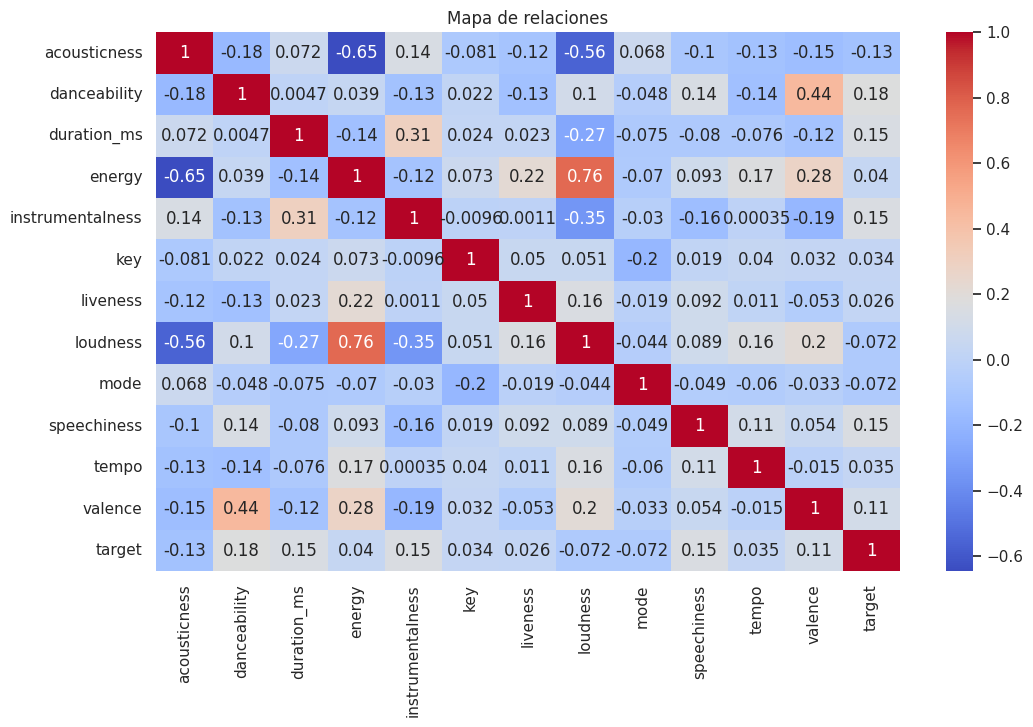

In [425]:
# Gráfico de mapa de calor
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de relaciones')
plt.show()

Para no quedarnos solo con un análisis humano, entrecruzamos las variables para determinar los mayores puntos de relación. Concluyendo que los de mejores correlaciones son los Energy y Loudness, y en segundo lugar los Danceability y Valance.

In [426]:
# Parametros considerados
selected_features = df[["danceability", "energy", "valence", "loudness"]]

In [427]:
from sklearn.model_selection import train_test_split

# Separar características (X) y etiquetas (y)
X = selected_features
y = df["target"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Realizar varios modelos de Machine Learning:

In [428]:
from sklearn.model_selection import cross_val_score

# Validación cruzada k-fold
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5) # KNN (K-Nearest Neighbors)
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5) # SVM (Support Vector Machines)
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5)   # Árbol de decisión
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5)   # Bayes (Naive Bayes)

# Muestra los puntajes promedio de validación cruzada para cada modelo
print("K-Nearest Neighbors (KNN) - Puntaje promedio:", knn_scores.mean())
print("Support Vector Machines (SVM) - Puntaje promedio:", svm_scores.mean())
print("Árbol de decisión - Puntaje promedio:", dt_scores.mean())
print("Naive Bayes - Puntaje promedio:", nb_scores.mean())

K-Nearest Neighbors (KNN) - Puntaje promedio: 0.6354652616195219
Support Vector Machines (SVM) - Puntaje promedio: 0.6354421860277292
Árbol de decisión - Puntaje promedio: 0.5926831144357056
Naive Bayes - Puntaje promedio: 0.5883333653827665


## Realizar algún tipo de validación:

## Evaluación y análisis del rendimiento de cada modelo:

## Ajustar para cada uno de los modelos los hiper parámetros:

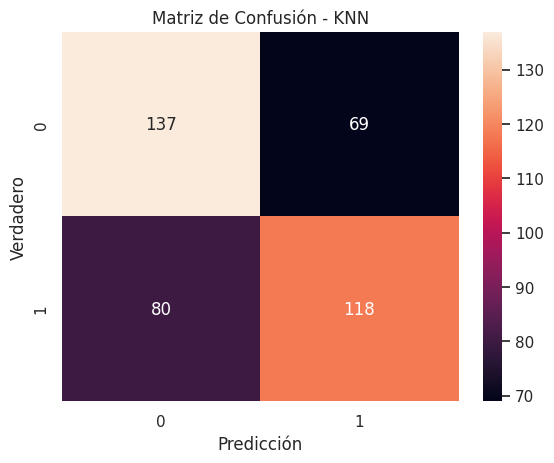

In [429]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Entrenar el modelo KNN con los datos de entrenamiento
knn_model.fit(X_train, y_train) # se puede sacar ya que esta mas arriba

# Realizar predicciones en los datos de prueba
y_pred_knn = knn_model.predict(X_test)

# Matriz de confusión para el modelo KNN
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Matriz de Confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()


In [430]:

# Ajuste de Hiperparámetros para ver si podemos mejorar su rendimiento
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que deseas ajustar para cada modelo
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
dt_param_grid = {'max_depth': [None, 5, 10, 15]}
nb_param_grid = {}  # No hay hiperparámetros para ajustar en Naive Bayes

# Crear objetos GridSearchCV para cada modelo
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=5)
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv=5)
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=5)
nb_grid = nb_model  # No se ajustan hiperparámetros en Naive Bayes

# Realizar el ajuste de hiperparámetros
knn_grid.fit(X_train, y_train)
svm_grid.fit(X_train, y_train)
dt_grid.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_knn_params = knn_grid.best_params_
best_svm_params = svm_grid.best_params_
best_dt_params = dt_grid.best_params_

## Realizar un ensamble de los modelos:

In [431]:
from sklearn.ensemble import VotingClassifier

# Crear un modelo de votación mayoritaria
voting_model = VotingClassifier(estimators=[
    ('KNN', knn_model),
    ('SVM', svm_model),
    ('DecisionTree', dt_model),
    ('NaiveBayes', nb_model)
], voting='hard')  # 'hard' significa votación por mayoría

# Entrenar el modelo de votación con los datos de entrenamiento
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()), ('SVM', SVC()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('NaiveBayes', GaussianNB())])

In [432]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predicciones del modelo de votación
y_pred_voting = voting_model.predict(X_test)

# Predicciones de cada modelo individual
y_pred_knn = knn_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

# Función para imprimir métricas
def print_metrics(y_true, y_pred, model_name):
    print(f"Modelo: {model_name}")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("Exactitud (Accuracy):", accuracy_score(y_true, y_pred))
    print("\n")

# Imprimir métricas para el modelo de votación
print_metrics(y_test, y_pred_voting, "Modelo de Votación")

# Imprimir métricas para cada modelo individual
print_metrics(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
print_metrics(y_test, y_pred_svm, "Support Vector Machines (SVM)")
print_metrics(y_test, y_pred_dt, "Árbol de decisión")
print_metrics(y_test, y_pred_nb, "Naive Bayes")


Modelo: Modelo de Votación
Matriz de Confusión:
[[159  47]
 [ 81 117]]
Precisión: 0.7134146341463414
Recall: 0.5909090909090909
F1-Score: 0.6464088397790055
Exactitud (Accuracy): 0.6831683168316832


Modelo: K-Nearest Neighbors (KNN)
Matriz de Confusión:
[[137  69]
 [ 80 118]]
Precisión: 0.6310160427807486
Recall: 0.5959595959595959
F1-Score: 0.612987012987013
Exactitud (Accuracy): 0.6311881188118812


Modelo: Support Vector Machines (SVM)
Matriz de Confusión:
[[141  65]
 [ 77 121]]
Precisión: 0.6505376344086021
Recall: 0.6111111111111112
F1-Score: 0.6302083333333334
Exactitud (Accuracy): 0.6485148514851485


Modelo: Árbol de decisión
Matriz de Confusión:
[[132  74]
 [ 75 123]]
Precisión: 0.6243654822335025
Recall: 0.6212121212121212
F1-Score: 0.6227848101265823
Exactitud (Accuracy): 0.6311881188118812


Modelo: Naive Bayes
Matriz de Confusión:
[[ 84 122]
 [ 45 153]]
Precisión: 0.5563636363636364
Recall: 0.7727272727272727
F1-Score: 0.6469344608879493
Exactitud (Accuracy): 0.5866336633

## Evaluación y análisis del rendimiento:

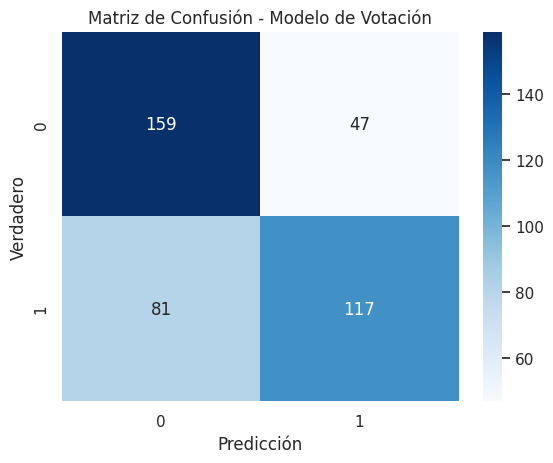

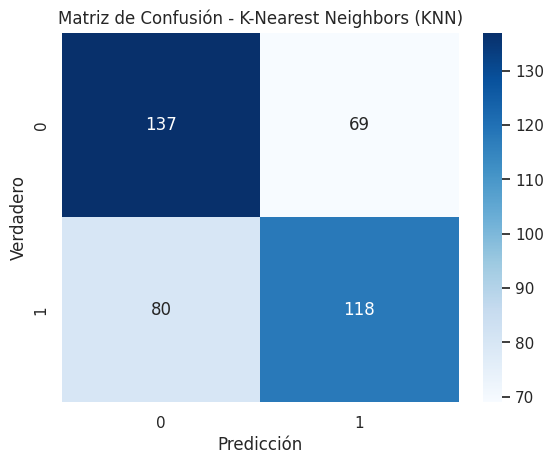

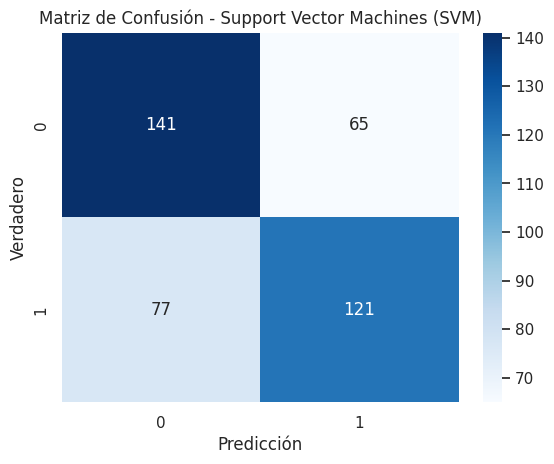

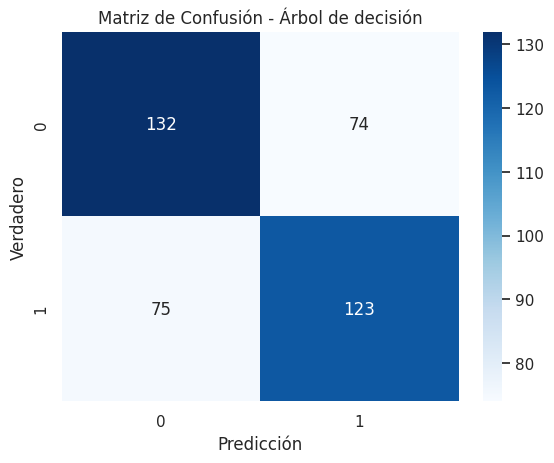

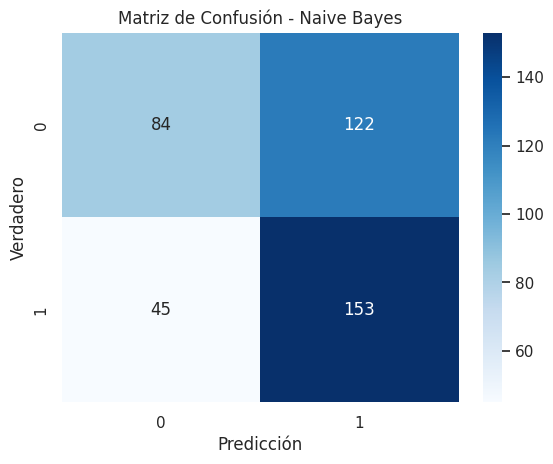

In [433]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones del modelo de votación
y_pred_voting = voting_model.predict(X_test)

# Predicciones de cada modelo individual
y_pred_knn = knn_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

def Matriz_confusion_grafica(y_true, y_pred, model_name):
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Visualizar la matriz de confusión con Seaborn
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.show()

Matriz_confusion_grafica(y_test, y_pred_voting, "Modelo de Votación")
Matriz_confusion_grafica(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
Matriz_confusion_grafica(y_test, y_pred_svm, "Support Vector Machines (SVM)")
Matriz_confusion_grafica(y_test, y_pred_dt, "Árbol de decisión")
Matriz_confusion_grafica(y_test, y_pred_nb, "Naive Bayes")

In [434]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular precisión, recall y F1-score para KNN
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)


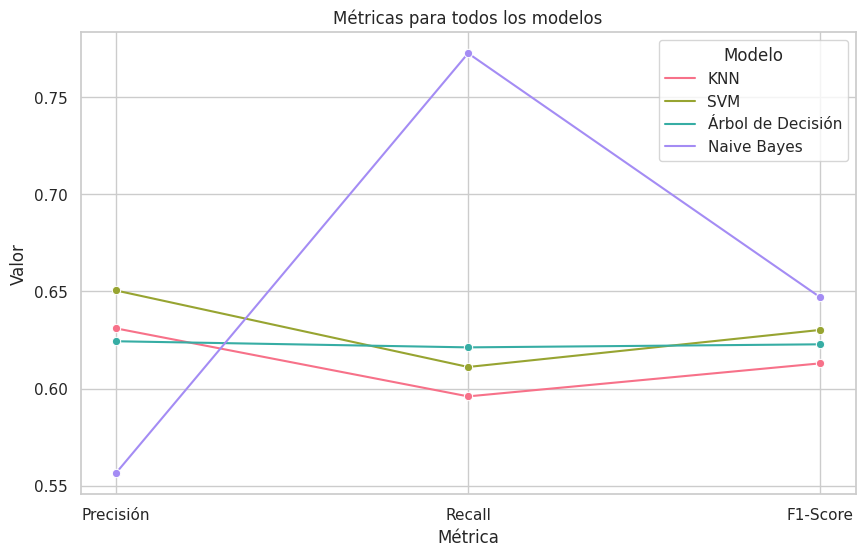

In [435]:

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con todas las métricas para todos los modelos
all_metrics = pd.DataFrame({
    'Modelo': ['KNN', 'SVM', 'Árbol de Decisión', 'Naive Bayes'],
    'Precisión': [precision_knn, precision_svm, precision_dt, precision_nb],
    'Recall': [recall_knn, recall_svm, recall_dt, recall_nb],
    'F1-Score': [f1_knn, f1_svm, f1_dt, f1_nb]
})

# Reorganizar los datos para el lineplot
all_metrics = all_metrics.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

# Visualización de todas las métricas en un lineplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Métrica', y='Valor', hue='Modelo', data=all_metrics, palette='husl', marker='o')
plt.title('Métricas para todos los modelos')
plt.ylabel('Valor')
plt.show()

# Conclucion
dgdgdgsgs